# Document Clustering using LLM Embeddings

This notebook demonstrates clustering of text documents using state-of-the-art LLM embeddings from sentence-transformers.

## Overview
- Uses sentence-transformers for generating high-quality embeddings
- Applies clustering algorithms on document embeddings
- Evaluates clustering quality
- Visualizes results using dimensionality reduction


In [1]:
# Install required packages (uncomment if needed)
!pip install sentence-transformers scikit-learn matplotlib seaborn numpy pandas

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Prepare Sample Documents


In [2]:
# Sample documents from different topics
documents = [
    # Technology
    "Artificial intelligence is transforming the way we work and live.",
    "Machine learning algorithms can process vast amounts of data.",
    "Deep learning neural networks are inspired by the human brain.",
    "Natural language processing enables computers to understand text.",
    "Computer vision allows machines to interpret visual information.",

    # Science
    "Quantum physics explores the behavior of matter at atomic scales.",
    "The theory of relativity revolutionized our understanding of space and time.",
    "DNA contains the genetic information of all living organisms.",
    "Photosynthesis is the process by which plants convert light into energy.",
    "The periodic table organizes chemical elements by their properties.",

    # Sports
    "Football is one of the most popular sports worldwide.",
    "Basketball requires excellent coordination and teamwork.",
    "Tennis players compete in singles and doubles matches.",
    "Swimming is an excellent form of cardiovascular exercise.",
    "Soccer matches are played with two teams of eleven players each.",

    # Cooking
    "Italian cuisine is known for pasta, pizza, and risotto.",
    "French cooking techniques emphasize sauces and presentation.",
    "Asian cuisine often features rice, noodles, and fresh vegetables.",
    "Baking requires precise measurements and temperature control.",
    "Grilling adds a smoky flavor to meats and vegetables.",
]

# True labels for evaluation
true_labels = [0]*5 + [1]*5 + [2]*5 + [3]*5  # 4 clusters

print(f"Number of documents: {len(documents)}")
print(f"Number of clusters: {len(set(true_labels))}")
print("\nSample documents:")
for i, doc in enumerate(documents[:3]):
    print(f"{i+1}. {doc}")


Number of documents: 20
Number of clusters: 4

Sample documents:
1. Artificial intelligence is transforming the way we work and live.
2. Machine learning algorithms can process vast amounts of data.
3. Deep learning neural networks are inspired by the human brain.


## Generate Embeddings using Sentence Transformers


In [3]:
# Load pre-trained sentence transformer model
# Using a lightweight model for faster processing
print("Loading sentence transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded successfully!")

# Generate embeddings for all documents
print("Generating embeddings...")
embeddings = model.encode(documents, show_progress_bar=True)
print(f"Embeddings shape: {embeddings.shape}")
print(f"Embedding dimension: {embeddings.shape[1]}")


Loading sentence transformer model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully!
Generating embeddings...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embeddings shape: (20, 384)
Embedding dimension: 384


## Apply Clustering on Embeddings


In [4]:
# Apply K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate metrics
silhouette = silhouette_score(embeddings, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)
db_score = davies_bouldin_score(embeddings, cluster_labels)

print("CLUSTERING RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print("=" * 50)

# Show cluster assignments
print("\nCluster Assignments:")
for i, (doc, true_label, pred_label) in enumerate(zip(documents, true_labels, cluster_labels)):
    print(f"Doc {i+1}: Cluster {pred_label} (True: {true_label}) - {doc[:50]}...")


CLUSTERING RESULTS
Silhouette Score: 0.1007
Adjusted Rand Index: 0.6456
Davies-Bouldin Index: 1.9704

Cluster Assignments:
Doc 1: Cluster 0 (True: 0) - Artificial intelligence is transforming the way we...
Doc 2: Cluster 0 (True: 0) - Machine learning algorithms can process vast amoun...
Doc 3: Cluster 0 (True: 0) - Deep learning neural networks are inspired by the ...
Doc 4: Cluster 0 (True: 0) - Natural language processing enables computers to u...
Doc 5: Cluster 0 (True: 0) - Computer vision allows machines to interpret visua...
Doc 6: Cluster 2 (True: 1) - Quantum physics explores the behavior of matter at...
Doc 7: Cluster 0 (True: 1) - The theory of relativity revolutionized our unders...
Doc 8: Cluster 0 (True: 1) - DNA contains the genetic information of all living...
Doc 9: Cluster 2 (True: 1) - Photosynthesis is the process by which plants conv...
Doc 10: Cluster 2 (True: 1) - The periodic table organizes chemical elements by ...
Doc 11: Cluster 3 (True: 2) - Football is one 

## Visualize Clustering Results


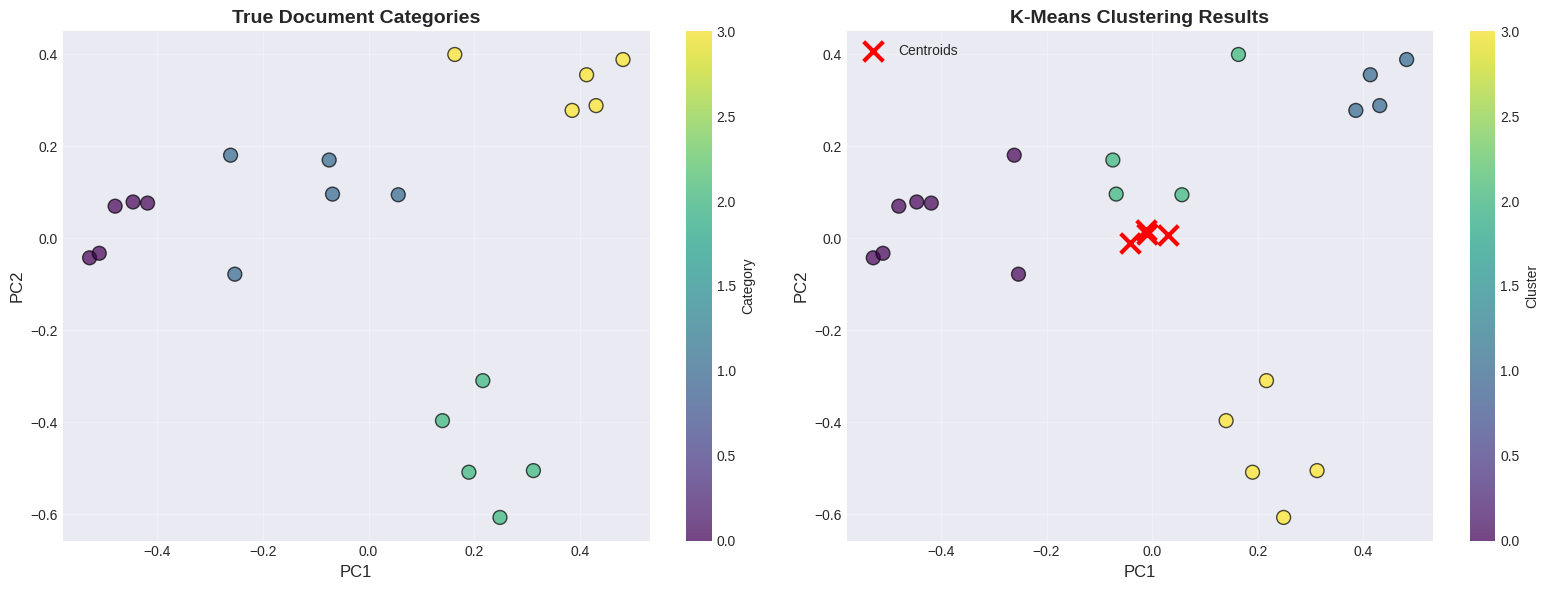

In [5]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# True labels
scatter1 = axes[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                          c=true_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[0].set_title('True Document Categories', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Category')

# Predicted clusters
scatter2 = axes[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                          c=cluster_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].set_title('K-Means Clustering Results', fontsize=14, fontweight='bold')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()


## Analyze Cluster Contents


In [6]:
# Analyze what documents are in each cluster
print("CLUSTER ANALYSIS")
print("=" * 70)
for cluster_id in range(n_clusters):
    cluster_docs = [doc for doc, label in zip(documents, cluster_labels) if label == cluster_id]
    cluster_true_labels = [true_labels[i] for i, label in enumerate(cluster_labels) if label == cluster_id]

    print(f"\nCluster {cluster_id} ({len(cluster_docs)} documents):")
    print(f"  Most common true category: {max(set(cluster_true_labels), key=cluster_true_labels.count)}")
    print("  Documents:")
    for doc in cluster_docs:
        print(f"    - {doc}")
print("=" * 70)


CLUSTER ANALYSIS

Cluster 0 (7 documents):
  Most common true category: 0
  Documents:
    - Artificial intelligence is transforming the way we work and live.
    - Machine learning algorithms can process vast amounts of data.
    - Deep learning neural networks are inspired by the human brain.
    - Natural language processing enables computers to understand text.
    - Computer vision allows machines to interpret visual information.
    - The theory of relativity revolutionized our understanding of space and time.
    - DNA contains the genetic information of all living organisms.

Cluster 1 (4 documents):
  Most common true category: 3
  Documents:
    - Italian cuisine is known for pasta, pizza, and risotto.
    - French cooking techniques emphasize sauces and presentation.
    - Asian cuisine often features rice, noodles, and fresh vegetables.
    - Grilling adds a smoky flavor to meats and vegetables.

Cluster 2 (4 documents):
  Most common true category: 1
  Documents:
    - Qua

## Compare Different Embedding Models


In [7]:
# Try different models (commented out for faster execution, uncomment to test)
# models_to_test = {
#     'all-MiniLM-L6-v2': 'all-MiniLM-L6-v2',
#     'all-mpnet-base-v2': 'all-mpnet-base-v2',  # Larger, better quality
# }

# For demonstration, we'll use the same model but show how to compare
print("Note: To compare different models, load them and generate embeddings separately.")
print("Example models:")
print("  - all-MiniLM-L6-v2: Fast, 384 dimensions")
print("  - all-mpnet-base-v2: Slower but higher quality, 768 dimensions")
print("  - paraphrase-MiniLM-L6-v2: Optimized for semantic similarity")


Note: To compare different models, load them and generate embeddings separately.
Example models:
  - all-MiniLM-L6-v2: Fast, 384 dimensions
  - all-mpnet-base-v2: Slower but higher quality, 768 dimensions
  - paraphrase-MiniLM-L6-v2: Optimized for semantic similarity


## Summary

This notebook demonstrated:
1. Document clustering using LLM embeddings from sentence-transformers
2. Generating high-quality semantic embeddings for text documents
3. Applying K-Means clustering on document embeddings
4. Evaluating clustering quality using multiple metrics
5. Visualizing results using PCA dimensionality reduction

### Key Takeaways:
- LLM embeddings capture semantic meaning better than traditional methods
- Sentence-transformers provide easy-to-use pre-trained models
- Embeddings can be used with standard clustering algorithms
- Higher-dimensional embeddings often lead to better clustering
- Different models offer trade-offs between speed and quality
